In [36]:
import os
os.chdir('../..')
import numpy as np
from rdkit.Chem import MolFromSmarts

PATTERNS = [MolFromSmarts("[#8]-[#6](=O)"+"~[#6]" * i +"(-[#8])=O") for i in range(3,16)]


def contains_pharm(mol):
    for patt in PATTERNS:
        if mol.HasSubstructMatch(PHARM_PATTERN):
            return True
    return False

In [37]:
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.inchi import MolFromInchi

import pickle
from molexplain.utils import DATA_PATH

In [38]:
with open(os.path.join(DATA_PATH, "ppb", "data_ppb.pt"), "rb") as handle:
    inchis, values = pickle.load(handle)

from tqdm import tqdm

filtered = []
idxs = []
for idx, inchi in enumerate(tqdm(inchis)):
    if contains_pharm(MolFromInchi(inchi)):
        filtered.append(inchi)
        idxs.append(idx)

vals = [values[idx] for idx in idxs]

100%|██████████| 4634/4634 [00:02<00:00, 1854.87it/s]


In [39]:
len(filtered)

31

In [15]:
from molexplain.vis import molecule_importance
from molexplain.utils import MODELS_PATH
from molexplain.train import DEVICE

Using backend: pytorch


In [16]:
import torch
model_pt = os.path.join(MODELS_PATH, 'ppb_noHs.pt')

from molexplain.net import MPNNPredictor

model = MPNNPredictor(node_in_feats=49,
                      edge_in_feats=10,
                      global_feats=4,
                      n_tasks=1).to(DEVICE) 
model.load_state_dict(torch.load(model_pt,
                                 map_location=DEVICE))

<All keys matched successfully>

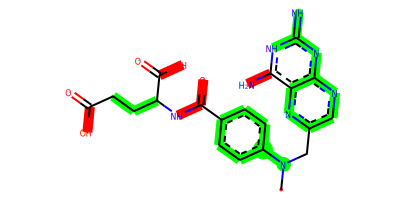

In [70]:
mol = MolFromInchi(filtered[0])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-3,
                                                      addHs=False)
img

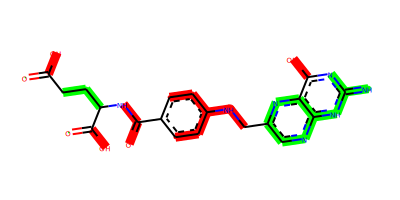

In [23]:
mol = MolFromInchi(filtered[1])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-4,
                                                      addHs=False)
img

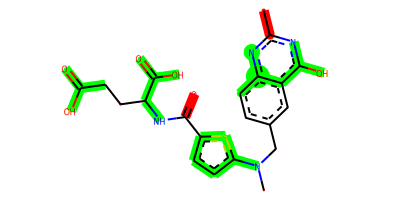

In [24]:
mol = MolFromInchi(filtered[2])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-4,
                                                      addHs=False)
img

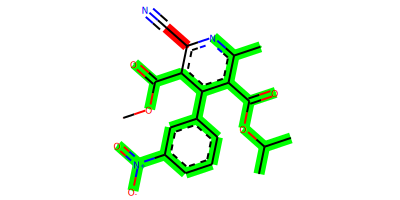

In [25]:
mol = MolFromInchi(filtered[3]) # could show
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-4,
                                                      addHs=False)
img

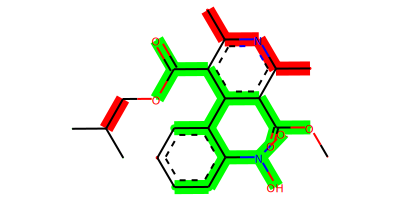

In [26]:
mol = MolFromInchi(filtered[4])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-4,
                                                      addHs=False)
img

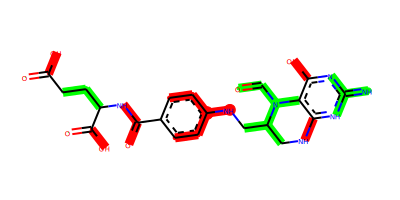

In [27]:
mol = MolFromInchi(filtered[5])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-4,
                                                      addHs=False)
img

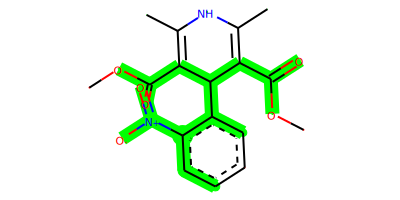

In [28]:
mol = MolFromInchi(filtered[6])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-4,
                                                      addHs=False)
img

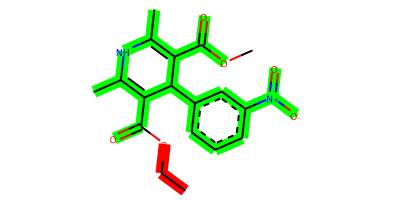

In [29]:
mol = MolFromInchi(filtered[7])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-4,
                                                      addHs=False)
img

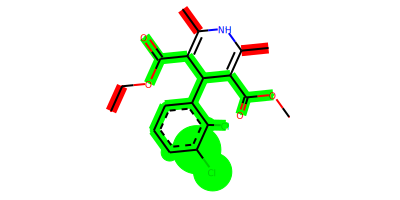

In [30]:
mol = MolFromInchi(filtered[8])  # could show
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-4,
                                                      addHs=False)
img

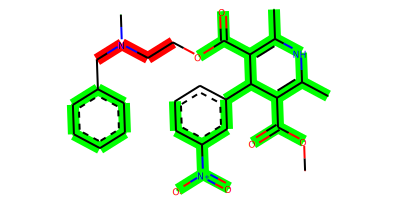

In [41]:
mol = MolFromInchi(filtered[9]) # does this work?
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-3,
                                                      addHs=False)
img

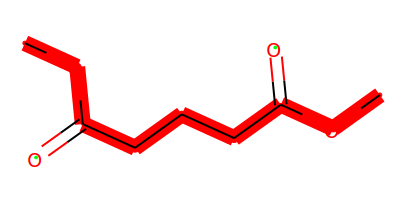

In [43]:
mol = MolFromInchi(filtered[10])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-3,
                                                      addHs=False)
img

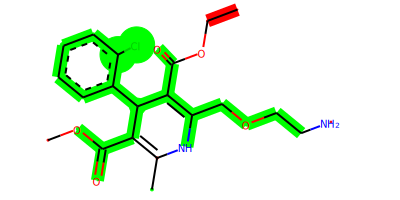

In [44]:
mol = MolFromInchi(filtered[11])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=1,
                                                      eps=1e-3,
                                                      addHs=False)
img

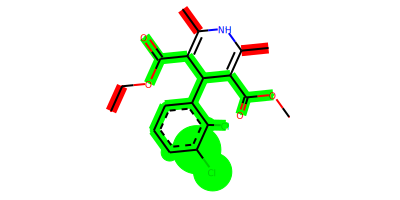

In [46]:
mol = MolFromInchi(filtered[12]) # could show
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-3,
                                                      addHs=False)
img

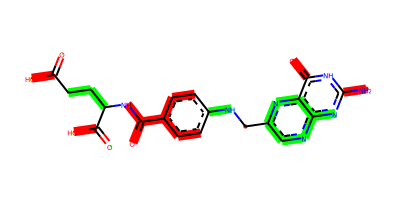

In [47]:
mol = MolFromInchi(filtered[13])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-3,
                                                      addHs=False)
img

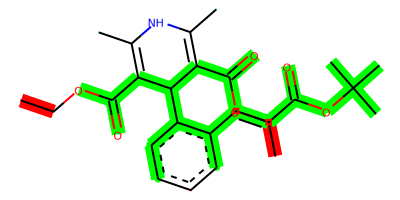

In [48]:
mol = MolFromInchi(filtered[14])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-3,
                                                      addHs=False)
img

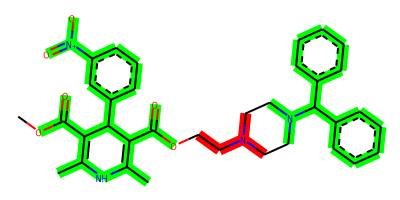

In [49]:
mol = MolFromInchi(filtered[15]) # could show, but does it count?
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-3,
                                                      addHs=False)
img

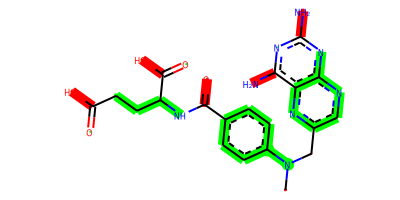

In [50]:
mol = MolFromInchi(filtered[16])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-3,
                                                      addHs=False)
img

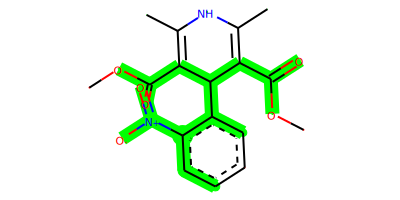

In [51]:
mol = MolFromInchi(filtered[17])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-3,
                                                      addHs=False)
img

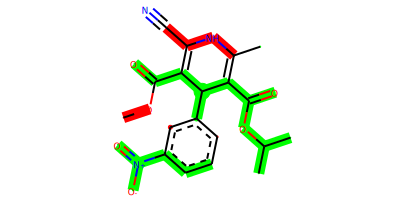

In [52]:
mol = MolFromInchi(filtered[18]) # does this count?
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-3,
                                                      addHs=False)
img

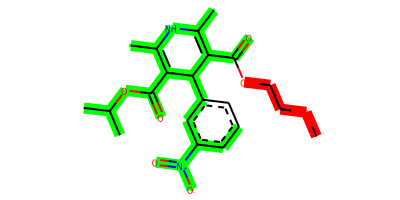

In [53]:
mol = MolFromInchi(filtered[19]) # does this count?
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-3,
                                                      addHs=False)
img

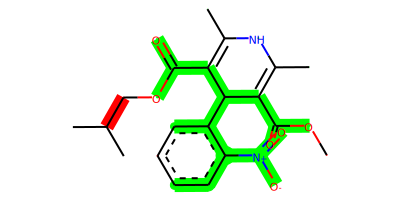

In [54]:
mol = MolFromInchi(filtered[20])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-3,
                                                      addHs=False)
img

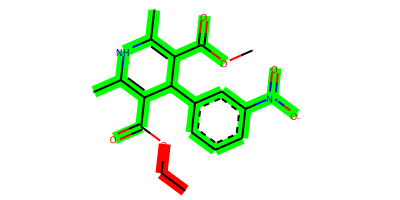

In [55]:
mol = MolFromInchi(filtered[21])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-3,
                                                      addHs=False)
img

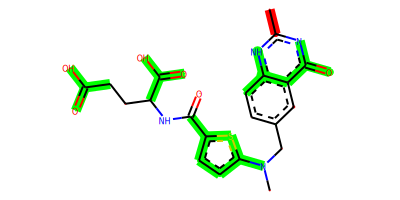

In [57]:
mol = MolFromInchi(filtered[22])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-4,
                                                      addHs=False)
img

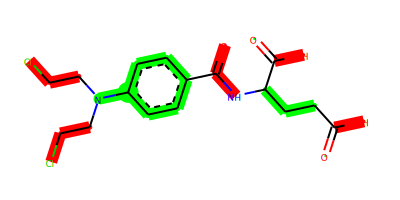

In [61]:
mol = MolFromInchi(filtered[24])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-4,
                                                      addHs=False)
img

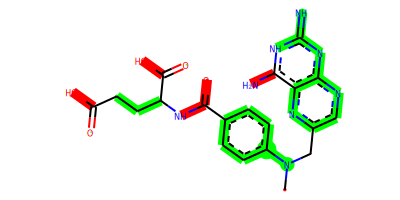

In [62]:
mol = MolFromInchi(filtered[25])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-4,
                                                      addHs=False)
img

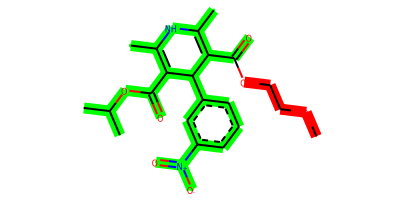

In [63]:
mol = MolFromInchi(filtered[26])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-4,
                                                      addHs=False)
img

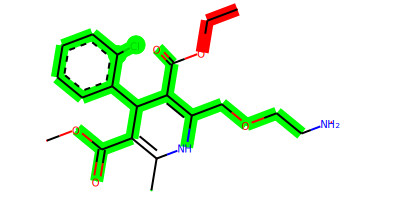

In [64]:
mol = MolFromInchi(filtered[27])  # does this count?
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-4,
                                                      addHs=False)
img

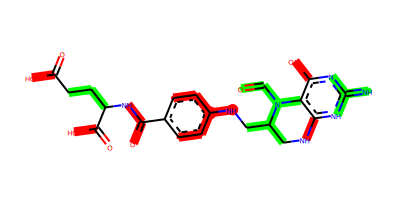

In [66]:
mol = MolFromInchi(filtered[29])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-4,
                                                      addHs=False)
img

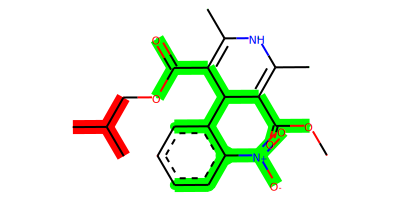

In [67]:
mol = MolFromInchi(filtered[30])
svg, img, _, _, global_importance = molecule_importance(mol,
                                                      model,
                                                      task=0,
                                                      version=2,
                                                      vis_factor=0.5,
                                                      eps=1e-4,
                                                      addHs=False)
img

In [68]:
filtered[30]

'InChI=1S/C20H24N2O6/c1-11(2)10-28-20(24)17-13(4)21-12(3)16(19(23)27-5)18(17)14-8-6-7-9-15(14)22(25)26/h6-9,11,18,21H,10H2,1-5H3'

In [69]:
from rdkit.Chem import MolToSmiles
smi = MolToSmiles(MolFromInchi(filtered[30]))
smi

'COC(=O)C1=C(C)NC(C)=C(C(=O)OCC(C)C)C1c1ccccc1[N+](=O)[O-]'